In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
import datetime
# S&P 500 SPX monthly index from 1959
csv_file = 'https://data.nasdaq.com/api/v3/datasets/MULTPL/SP500_REAL_PRICE_MONTH.csv?start_date=1959-01-01'
local_file = '../data/spx_PriceMonthly.csv'
max_age = datetime.timedelta(days=1)
if not os.path.exists(local_file) or datetime.datetime.now() - datetime.datetime.fromtimestamp(os.path.getmtime(local_file)) > max_age:
    import urllib.request
    urllib.request.urlretrieve(csv_file, local_file)

In [4]:
df = pd.read_csv(csv_file, encoding='cp1252')
df.head()

,Date,Value
0,2023-11-01,4274.79
1,2023-10-31,4193.80
2,2023-10-01,4269.40
3,2023-09-01,4409.10
4,2023-08-31,4507.66


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Value
Date,
1959-01-01,55.62
1959-02-01,54.77
1959-03-01,56.16
1959-04-01,57.10
1959-05-01,57.96


In [6]:
# source data contains some 1st day of month and some last day of month
# but not consistent (not always business day on first/last day of month??)
# resample to ensure we have one row per month
df_monthly_delta = df.resample('M').mean()
df_monthly_delta.head()

,Value
Date,
1959-01-31,55.62
1959-02-28,54.77
1959-03-31,56.16
1959-04-30,57.10
1959-05-31,57.96


In [7]:
df_monthly_delta['Change'] = df_monthly_delta.pct_change(periods=12)*100
#df_monthly_delta.pct_change()
df_monthly_delta.tail()

,Value,Change
Date,,
2023-07-31,4548.52,16.278987
2023-08-31,4482.51,10.494284
2023-09-30,4409.10,18.585718
2023-10-31,4231.60,11.386767
2023-11-30,4274.79,6.901821


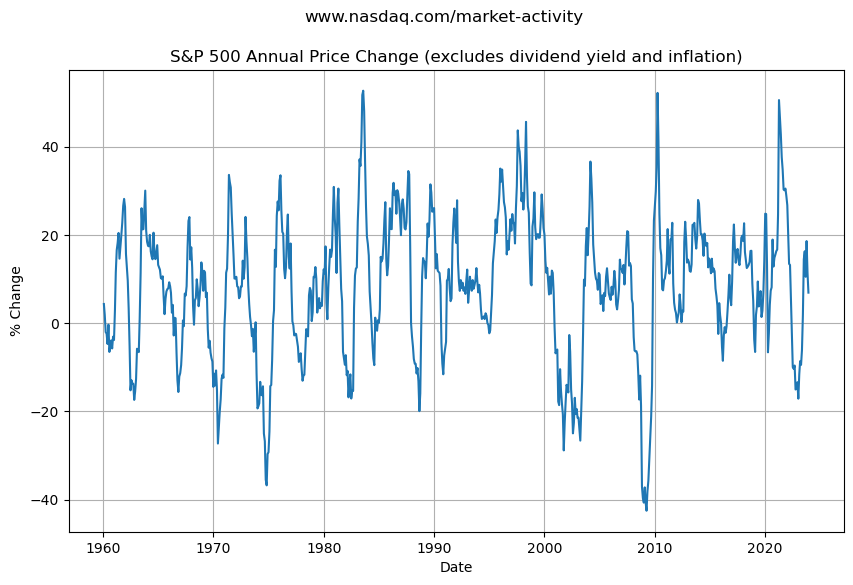

In [8]:
plt.figure(figsize=(10, 6))
#plt.plot(df_monthly_average.index, df_monthly_average['Price'])
plt.plot(df_monthly_delta.index, df_monthly_delta['Change'])
plt.xlabel('Date')
plt.ylabel('% Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('S&P 500 YoY Annual Price Change (excludes dividend yield and inflation)')
plt.grid(True)
plt.show()

In [9]:
df_monthly_delta['3_yr_rolling'] = df_monthly_delta['Change'].rolling(window=36, min_periods=1).mean()
df_monthly_delta.tail()

,Value,Change,3_yr_rolling
Date,,,
2023-07-31,4548.52,16.278987,12.071860
2023-08-31,4482.51,10.494284,11.837522
2023-09-30,4409.10,18.585718,11.997879
2023-10-31,4231.60,11.386767,11.902766
2023-11-30,4274.79,6.901821,11.664687


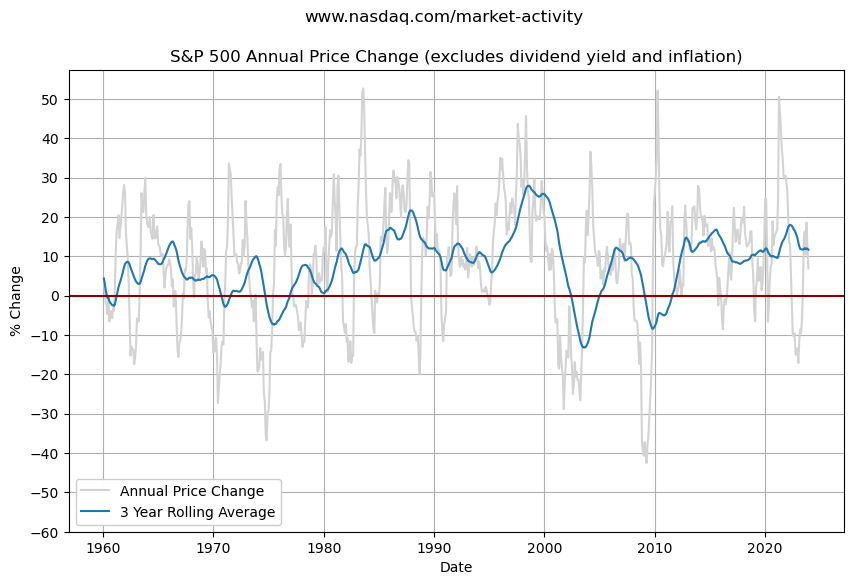

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_delta.index, df_monthly_delta['Change'], label='Annual Price Change', color='lightgrey')
plt.plot(df_monthly_delta.index, df_monthly_delta['3_yr_rolling'], label='3 Year Rolling Average')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('S&P 500 YoY Annual Price Change (excludes dividend yield and inflation)')
plt.yticks(range(-60, 60, 10))
plt.grid(True)
plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='lower left')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()